In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict,KFold, StratifiedKFold

In [43]:
df=pd.read_csv('/content/train_Df64byy.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [45]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [46]:
df2=pd.read_csv('/content/test_YCcRUnU.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [56]:
df3 = df.append(df2)

In [57]:
df3.drop('Holding_Policy_Duration',axis=1,inplace=True)
df3.drop('Holding_Policy_Type',axis=1,inplace=True)
df3.drop('Health Indicator',axis=1,inplace=True)
df3.drop('ID',axis=1,inplace=True)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City_Code            72687 non-null  object 
 1   Region_Code          72687 non-null  int64  
 2   Accomodation_Type    72687 non-null  object 
 3   Reco_Insurance_Type  72687 non-null  object 
 4   Upper_Age            72687 non-null  int64  
 5   Lower_Age            72687 non-null  int64  
 6   Is_Spouse            72687 non-null  object 
 7   Reco_Policy_Cat      72687 non-null  int64  
 8   Reco_Policy_Premium  72687 non-null  float64
 9   Response             50882 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 6.1+ MB


In [49]:
y=LabelEncoder()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


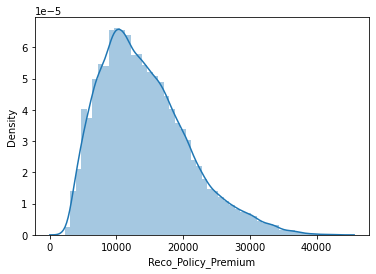

In [41]:
sns.distplot(df['Reco_Policy_Premium'])

In [58]:
df3['City_Code']=y.fit_transform(df3['City_Code'])
df3['Reco_Insurance_Type']=df3['Reco_Insurance_Type'].replace({'Individual':1,'Joint':2})
df3['Accomodation_Type']=df3['Accomodation_Type'].replace({'Owned':1,'Rented':2})
df3['Is_Spouse']=df3['Is_Spouse'].replace({'No':1,'Yes':2})
df3['Age_Group'] = np.where((df3['Upper_Age']<30) & (df3['Upper_Age'] > 60),0,1)
df3['Age_Group1'] = np.where((df3['Lower_Age']<30) & (df3['Lower_Age'] > 60),0,1)


In [61]:
df3.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Response,Age_Group,Age_Group1,PremiumperRegion,PremiumperReco_Policy_Cat,AvgCustomerUpper_AgeRegionWise,AvgCustomerLower_AgeRegionWise,AvgCustomerUpper_AgeReco_Policy_CatWise,AvgCustomerLower_AgeReco_Policy_CatWise,Reco_Policy_CatPerRegion,RegionwiseReco_Insurance_Type,RegionwiseAccomodation_Type,Reco_Policy_CatPerCity_Code,City_CodewiseReco_Insurance_Type,City_CodewiseAccomodation_Type,City_CodelsPerRegion,Upper_AgeperCity_Code,Lower_AgeperCity_Code,AvgRegionAccomodation_TyperWisePremium,Reco_Insurance_TypeRegionAccomodation_TypeWise,Reco_Insurance_TypeReco_Policy_CatReco_Insurance_TypeWise,Reco_Insurance_TypeReco_Policy_CatRegionWise,Reco_Insurance_TypeRegion_CodeCity_CodeWise,Region_CodeAccomodation_TypeCity_CodeWise
0,22,3213,2,1,36,36,1,22,11628.0,0.0,1,1,12130.080000,14589.814674,40.700000,40.500000,44.595306,42.263347,5,10,10,22,6954,6954,1,43.257118,41.240293,10120.500000,8,4117,1,10,1
1,31,1117,1,2,75,22,1,22,30510.0,0.0,1,1,16076.342857,14589.814674,41.333333,34.666667,44.595306,42.263347,4,21,21,21,1963,1963,1,40.978095,38.915436,17427.458824,17,5342,16,21,1
2,31,3732,1,1,32,32,1,19,7450.0,1.0,1,1,11336.000000,14714.576838,35.125000,34.875000,45.305697,43.082722,2,8,8,21,1963,1963,1,40.978095,38.915436,13263.333333,3,2897,2,8,1
3,16,4378,1,2,52,48,1,19,17780.0,0.0,1,1,14329.200000,14714.576838,48.400000,47.600000,45.305697,43.082722,4,5,5,19,823,823,1,46.939247,43.501823,14329.200000,5,2897,1,5,1
4,34,2190,2,1,44,44,1,16,10404.0,0.0,1,1,16664.157143,14264.687867,49.785714,44.285714,44.441410,42.378327,3,14,14,21,2579,2579,1,42.288484,40.535091,12992.000000,5,2779,11,14,1


In [59]:
df3['PremiumperRegion'] = df3.groupby('Region_Code')['Reco_Policy_Premium'].transform('mean')
df3['PremiumperReco_Policy_Cat'] = df3.groupby('Reco_Policy_Cat')['Reco_Policy_Premium'].transform('mean')
df3['AvgCustomerUpper_AgeRegionWise'] = df3.groupby('Region_Code')['Upper_Age'].transform('mean')
df3['AvgCustomerLower_AgeRegionWise'] = df3.groupby('Region_Code')['Lower_Age'].transform('mean')
df3['AvgCustomerUpper_AgeReco_Policy_CatWise'] = df3.groupby('Reco_Policy_Cat')['Upper_Age'].transform('mean')

df3['AvgCustomerLower_AgeReco_Policy_CatWise'] = df3.groupby('Reco_Policy_Cat')['Lower_Age'].transform('mean')
df3['Reco_Policy_CatPerRegion'] = df3.groupby('Region_Code')['Reco_Policy_Cat'].transform('nunique')
df3['RegionwiseReco_Insurance_Type'] = df3.groupby('Region_Code')['Reco_Insurance_Type'].transform('count')
df3['RegionwiseAccomodation_Type'] = df3.groupby('Region_Code')['Accomodation_Type'].transform('count')
df3['Reco_Policy_CatPerCity_Code'] = df3.groupby('City_Code')['Reco_Policy_Cat'].transform('nunique')
df3['City_CodewiseReco_Insurance_Type'] = df3.groupby('City_Code')['Reco_Insurance_Type'].transform('count')
df3['City_CodewiseAccomodation_Type'] = df3.groupby('City_Code')['Accomodation_Type'].transform('count')

df3['City_CodelsPerRegion'] = df3.groupby('Region_Code')['City_Code'].transform('nunique')
df3['Upper_AgeperCity_Code'] = df3.groupby('City_Code')['Upper_Age'].transform('mean')
df3['Lower_AgeperCity_Code'] = df3.groupby('City_Code')['Lower_Age'].transform('mean')



In [60]:
df3['AvgRegionAccomodation_TyperWisePremium'] = df3.groupby(['Region_Code','Accomodation_Type'])['Reco_Policy_Premium'].transform('mean')
df3['Reco_Insurance_TypeRegionAccomodation_TypeWise'] = df3.groupby(['Region_Code','Accomodation_Type'])['Reco_Insurance_Type'].transform('count')
df3['Reco_Insurance_TypeReco_Policy_CatReco_Insurance_TypeWise'] = df3.groupby(['Reco_Policy_Cat','Accomodation_Type'])['Reco_Insurance_Type'].transform('count')
df3['Reco_Insurance_TypeReco_Policy_CatRegionWise'] = df3.groupby(['Region_Code','Reco_Policy_Cat'])['Reco_Insurance_Type'].transform('count')
df3['Reco_Insurance_TypeRegion_CodeCity_CodeWise'] = df3.groupby(['Region_Code','City_Code'])['Reco_Insurance_Type'].transform('count')

df3['Region_CodeAccomodation_TypeCity_CodeWise'] = df3.groupby(['Region_Code','Accomodation_Type'])['City_Code'].transform('nunique')

In [54]:
df3.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'Age_Group', 'Age_Group1',
       'PremiumperRegion', 'PremiumperReco_Policy_Cat',
       'AvgCustomerUpper_AgeRegionWise', 'AvgCustomerLower_AgeRegionWise',
       'AvgCustomerUpper_AgeReco_Policy_CatWise',
       'AvgCustomerLower_AgeReco_Policy_CatWise', 'Reco_Policy_CatPerRegion',
       'RegionwiseReco_Insurance_Type', 'RegionwiseAccomodation_Type',
       'Reco_Policy_CatPerCity_Code', 'City_CodewiseReco_Insurance_Type',
       'City_CodewiseAccomodation_Type', 'City_CodelsPerRegion',
       'Upper_AgeperCity_Code', 'AvgRegionAccomodation_TyperWisePremium',
       'Reco_Insurance_TypeRegionAccomodation_TypeWise',
       'Reco_Insurance_TypeReco_Policy_CatReco_Insurance_TypeWise',
       'Reco_Insurance_TypeReco_Policy_CatRegionWise',
       'Reco_Insurance_TypeRegion_CodeCity_CodeWise',
       'Re

In [62]:
cat_col=['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Reco_Policy_Cat',
       'Age_Group', 'Age_Group1',
       'Reco_Policy_CatPerRegion',
       'RegionwiseReco_Insurance_Type', 'RegionwiseAccomodation_Type',
       'Reco_Policy_CatPerCity_Code', 'City_CodewiseReco_Insurance_Type',
       'City_CodewiseAccomodation_Type', 'City_CodelsPerRegion',
       'Reco_Insurance_TypeRegionAccomodation_TypeWise',
       'Reco_Insurance_TypeReco_Policy_CatReco_Insurance_TypeWise',
       'Reco_Insurance_TypeReco_Policy_CatRegionWise',
       'Reco_Insurance_TypeRegion_CodeCity_CodeWise',
       'Region_CodeAccomodation_TypeCity_CodeWise']

In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 33 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   City_Code                                                  72687 non-null  int64  
 1   Region_Code                                                72687 non-null  int64  
 2   Accomodation_Type                                          72687 non-null  int64  
 3   Reco_Insurance_Type                                        72687 non-null  int64  
 4   Upper_Age                                                  72687 non-null  int64  
 5   Lower_Age                                                  72687 non-null  int64  
 6   Is_Spouse                                                  72687 non-null  int64  
 7   Reco_Policy_Cat                                            72687 non-null  int64  
 8   Reco_P

In [64]:
train = df3[df3['Response'].isnull()!= True]
test = df3[df3['Response'].isnull()== True]

In [65]:
test.drop(['Response'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
X = train.drop(["Response"], axis=1)
Y = train["Response"]

In [67]:
oof_pred               = np.zeros((len(train),))
y_pred_final           = np.zeros((len(test),))
num_models             = 3

n_splits               = 10
error                  = []

kf=StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=294)
    
for i,(train_idx,val_idx) in enumerate(kf.split(X,Y)):    
    
    wghts                     = [0]*num_models
    test_roc_score            = []
    
    
    X_train, y_train = X.iloc[train_idx,:], Y.iloc[train_idx]

    X_val, y_val = X.iloc[val_idx, :], Y.iloc[val_idx]
    

    print('\nFold: {}\n'.format(i+1))

    model1 = cat.CatBoostClassifier(learning_rate = 0.03,random_state=42,scale_pos_weight=7, custom_metric=['AUC'])
    model1.fit(X_train,y_train,cat_features=cat_col,eval_set=(X_val, y_val),early_stopping_rounds=30,verbose=100)
    testpred1 = model1.predict_proba(X_val)[:,1]
    test_roc_score.append(roc_auc_score(y_val, testpred1))
    print("Test ROC AUC for model 1: %.4f"%(roc_auc_score(y_val, testpred1)))
    
    model2 = cat.CatBoostClassifier(learning_rate = 0.04,random_state=42,scale_pos_weight=7, custom_metric=['AUC'])
    model2.fit(X_train,y_train,cat_features=cat_col,eval_set=(X_val, y_val),early_stopping_rounds=40,verbose=100)
    testpred2 = model2.predict_proba(X_val)[:,1]
    test_roc_score.append(roc_auc_score(y_val, testpred2))
    print("Test ROC AUC for model 2: %.4f"%(roc_auc_score(y_val, testpred2)))
    
    model3 = cat.CatBoostClassifier(learning_rate = 0.05,random_state=42,scale_pos_weight=7, custom_metric=['AUC'])
    model3.fit(X_train,y_train,cat_features=cat_col,eval_set=(X_val, y_val),early_stopping_rounds=20,verbose=100)
    testpred3 = model3.predict_proba(X_val)[:,1]
    test_roc_score.append(roc_auc_score(y_val, testpred3))
    print("Test ROC AUC for model 3: %.4f"%(roc_auc_score(y_val, testpred3)))
    
    wghts              = np.exp(-1000*np.array(test_roc_score/sum(test_roc_score)))
    wghts              = wghts/sum(wghts)
    
    val_pred           = wghts[0]*testpred1+wghts[1]*testpred2 +wghts[2]*testpred3
    print('validation roc_auc_score fold-',i+1,': ',roc_auc_score(y_val, val_pred))
    
    oof_pred[val_idx]  = val_pred
    y_pred_final += (wghts[0]*model1.predict_proba(test)[:,1]+wghts[1]*model2.predict_proba(test)[:,1]+wghts[2]*model3.predict_proba(test)[:,1])/(n_splits)
    
    print('\n')
    
print('OOF ROC_AUC_Score:- ',(roc_auc_score(Y,oof_pred)))


Fold: 1

0:	learn: 0.6817733	test: 0.6809245	best: 0.6809245 (0)	total: 185ms	remaining: 3m 5s
100:	learn: 0.4850433	test: 0.4791909	best: 0.4791909 (100)	total: 16.9s	remaining: 2m 30s
200:	learn: 0.4759745	test: 0.4717787	best: 0.4717787 (200)	total: 34.1s	remaining: 2m 15s
300:	learn: 0.4712731	test: 0.4701347	best: 0.4701252 (291)	total: 50.7s	remaining: 1m 57s
400:	learn: 0.4661238	test: 0.4686921	best: 0.4686676 (399)	total: 1m 7s	remaining: 1m 41s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.4681944666
bestIteration = 439

Shrink model to first 440 iterations.
Test ROC AUC for model 1: 0.8130
0:	learn: 0.6780751	test: 0.6769483	best: 0.6769483 (0)	total: 195ms	remaining: 3m 14s
100:	learn: 0.4806149	test: 0.4751761	best: 0.4751761 (100)	total: 16.4s	remaining: 2m 25s
200:	learn: 0.4725180	test: 0.4705555	best: 0.4705555 (200)	total: 33.8s	remaining: 2m 14s
300:	learn: 0.4655926	test: 0.4684118	best: 0.4684118 (300)	total: 50.7s	remaining: 1m 57s
400:	lear

In [28]:
!pip install catboost 

     |████████████████████████████████| 65.7MB 60kB/s 


In [29]:
import catboost as cat

In [68]:
df5=pd.DataFrame(y_pred_final)
df5

,0
0,0.370898
1,0.347617
2,0.868456
3,0.362654
4,0.202180
...,...
21800,0.398941
21801,0.381061
21802,0.030922
21803,0.900573
